In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN


In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


5. 8219 rows x 4 columns
country or area = object
year = int64
value = float64
value footnotes = float64

In [6]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [7]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [8]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [9]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [10]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


In [11]:
gdp_df.isna().sum()

Country           0
Year              0
GDP_Per_Capita    0
dtype: int64

In [12]:
gdp_df_2020 = gdp_df[gdp_df['Year'] == 2020]

In [13]:
gdp_df_2020.head()

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748


array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

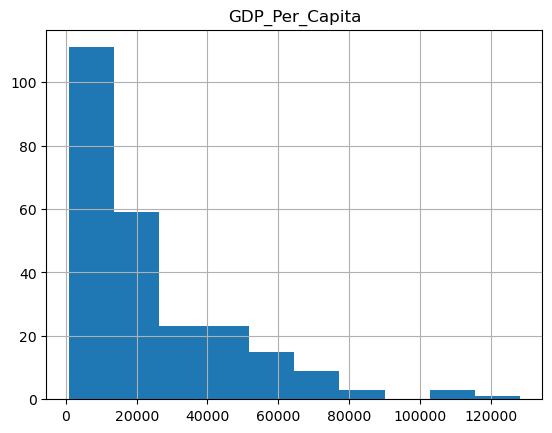

In [14]:
gdp_df_2020.hist(column = 'GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

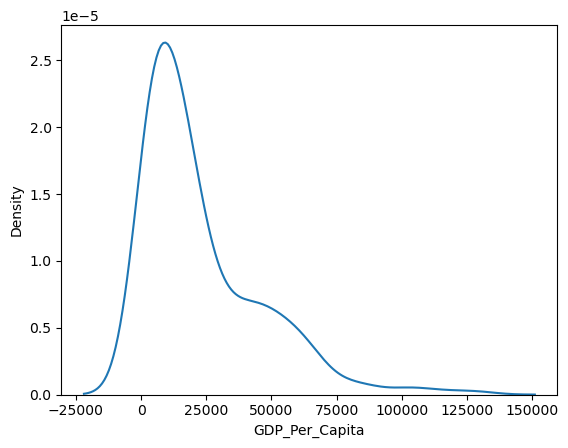

In [15]:
sns.kdeplot(gdp_df_2020['GDP_Per_Capita'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15eda52e810>,
 'caps': [<matplotlib.lines.Line2D at 0x15eda561e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x15ed9dee870>],
 'medians': [<matplotlib.lines.Line2D at 0x15eda5623c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15eda562630>],
 'means': []}

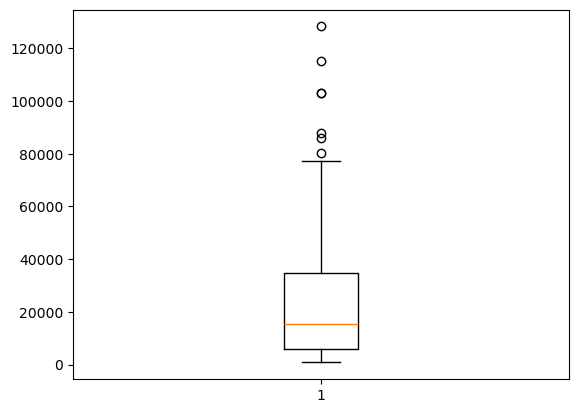

In [16]:
plt.boxplot(gdp_df_2020['GDP_Per_Capita'])

<Axes: xlabel='GDP_Per_Capita'>

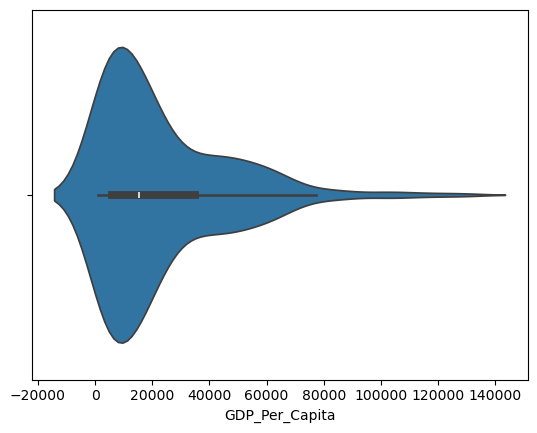

In [17]:
sns.violinplot(x=gdp_df_2020['GDP_Per_Capita'])

In [18]:
gdp_df_2020['GDP_Per_Capita'].median()

15309.23598817024

In [19]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

In [20]:
gdp_decades.head()

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012


{'whiskers': [<matplotlib.lines.Line2D at 0x15edaabf2f0>,
 'caps': [<matplotlib.lines.Line2D at 0x15edaabf8c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15edaabf0b0>],
 'medians': [<matplotlib.lines.Line2D at 0x15edaabfe00>],
 'fliers': [<matplotlib.lines.Line2D at 0x15edaaf00b0>],
 'means': []}

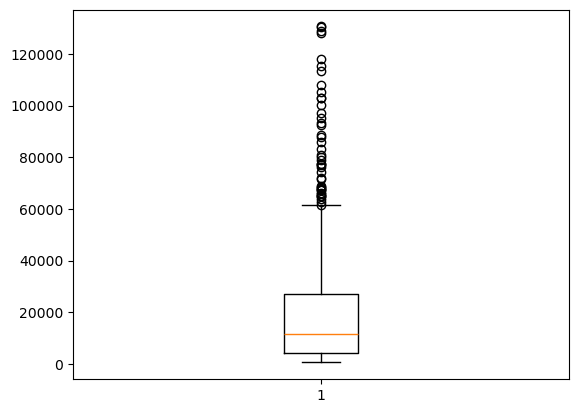

In [21]:
plt.boxplot(gdp_decades['GDP_Per_Capita'])

<Axes: >

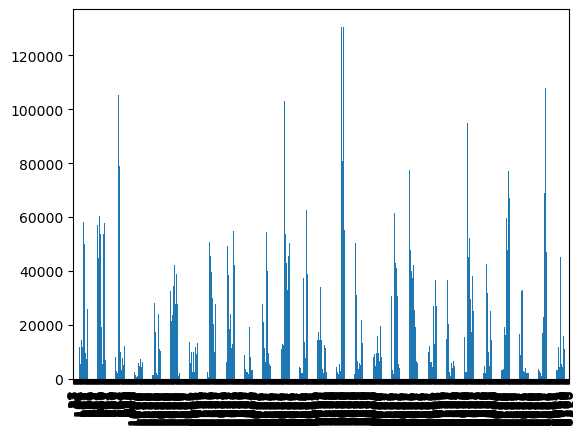

In [22]:
gdp_decades['GDP_Per_Capita'].plot(kind = 'bar')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

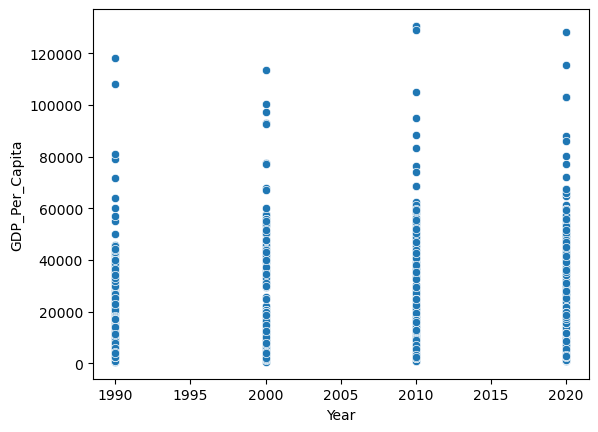

In [52]:
sns.scatterplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

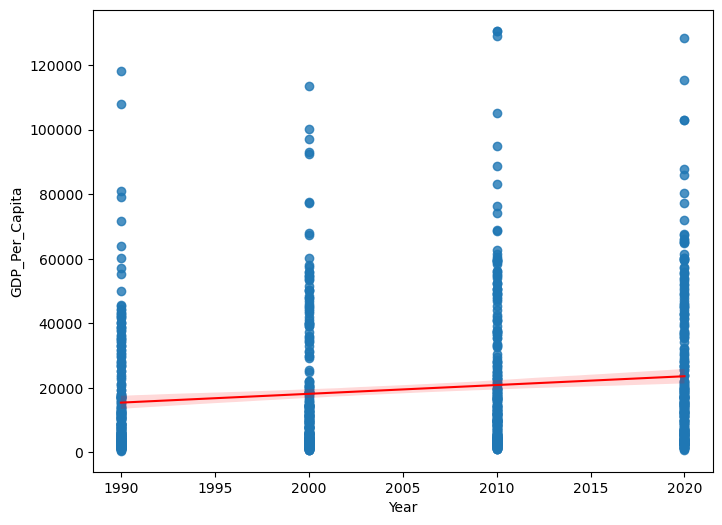

In [54]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "red", "linewidth": 1.5},
    ax=ax
)
plt.show()

In [56]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [58]:
gdp_100000 = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]

In [66]:
first = gdp_100000.groupby('Country')['Year'].min().reset_index()

In [68]:
first_country = first.loc[first['Year'].idxmin()]

In [70]:
first_country

Country    Brunei
Year         1990
Name: 1, dtype: object

In [72]:
gdp_df_2020.head()

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748


In [76]:
gdp_df_2020.loc[gdp_df_2020['GDP_Per_Capita'].idxmax()]

Country              Luxembourg
Year                       2020
GDP_Per_Capita    128256.560341
Name: 4426, dtype: object

In [82]:
luxembourg_df = gdp_df[gdp_df["Country"] == 'Luxembourg']

In [84]:
luxembourg_df.head()

,Country,Year,GDP_Per_Capita
4423,Luxembourg,2023,130373.477942
4424,Luxembourg,2022,134507.667531
4425,Luxembourg,2021,135379.291201
4426,Luxembourg,2020,128256.560341
4427,Luxembourg,2019,131609.099616


Text(0.5, 1.0, 'Luxembourg GDP Per Capita Over Time')

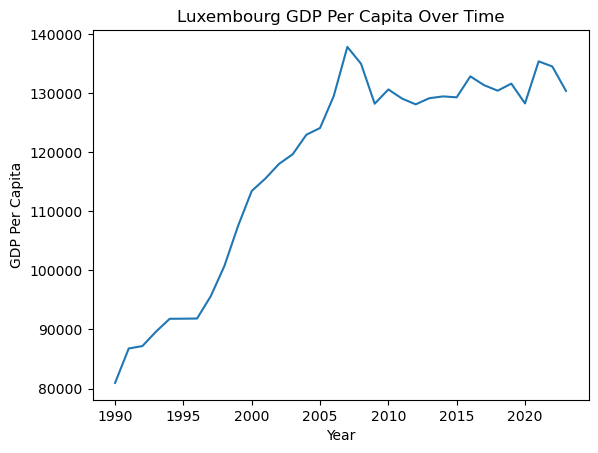

In [92]:
plt.plot(luxembourg_df['Year'], luxembourg_df['GDP_Per_Capita'])
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('Luxembourg GDP Per Capita Over Time')

In [78]:
gdp_df_2020.loc[gdp_df_2020['GDP_Per_Capita'].idxmin()]

Country              Burundi
Year                    2020
GDP_Per_Capita    833.920257
Name: 1046, dtype: object

In [94]:
burundi_df = gdp_df[gdp_df["Country"] == 'Burundi']

In [96]:
burundi_df.head()

,Country,Year,GDP_Per_Capita
1043,Burundi,2023,828.861074
1044,Burundi,2022,829.387160
1045,Burundi,2021,836.665571
1046,Burundi,2020,833.920257
1047,Burundi,2019,855.732720


Text(0.5, 1.0, 'Burundi GDP Per Capita Over Time')

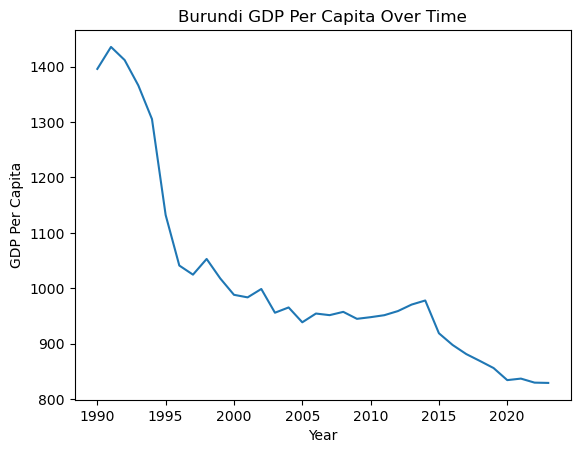

In [98]:
plt.plot(burundi_df['Year'], burundi_df['GDP_Per_Capita'])
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('Burundi GDP Per Capita Over Time')